<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/LoanTap_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

# Import required Libraries

In [414]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import datetime

In [415]:
!pip install simple_colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [416]:
from simple_colors import *

# Load the Dataset

In [417]:
# Load the dataset
data_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

# Statistical Summary of the Dataset

In [418]:
# Meta data of dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [419]:
# Description of the dataset
data_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [420]:
data_df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [421]:
# Shape of the dataset
print("Given dataset contains {0} Rows and {1} Columns ".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 396030 Rows and 27 Columns 


In [422]:
# Unique value counts
data_df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [423]:
# Count of each object variables 
def display_value_counts(df):
  for col in df.astype('object').columns:
    if len(df[col].value_counts())<10:
      print(blue(col, ['bold']))
      print(df[col].value_counts().to_string(),'\n')

In [424]:
# Call the method to display the value counts
display_value_counts(data_df)

term
 36 months    302005
 60 months     94025 

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054 

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3 

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082 

loan_status
Fully Paid     318357
Charged Off     77673 

initial_list_status
f    238066
w    157964 

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286 

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2 



#### **Observations**: 
*   Loan Term 36 months is more predominant than 60 months
*   Grade B and C has more counts than other grades
*   In terms of Ownership, 'Mortgage' tops the list
*   3/4th of the Customers have fully paid back the loan
*   "Individual" seems to be the popular amongst the application type  




In [425]:
data_df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


# Data Pre-Processing and Data Engineering

### Missing Values check

In [426]:
# Method to check missing values
def check_for_missing_values(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, round(percentage_missing_df, 2)],axis = 1, keys=['Total', 'Percent'])
    return missingDF

In [427]:
# Display the columns those who have Missing Values
missing_data = check_for_missing_values(data_df)
print(blue("Following Features have Missing Values \n", ['bold']))
missing_data[missing_data["Total"]>0]

Following Features have Missing Values 



,Total,Percent
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


#### **Observation**: 
*   Clearly 'mort_acc', 'emp_title', and 'emp_length' have significant null values. Remaining features have negligible null values which can be dropped.
*   Null values in 'emp_title' can be filled with 'Unknown title'
*   Null values in 'emp_length' can be imputed with mean value
*   'mort_acc' is number of mortgage accounts. We have to impute it with median to it's null values

In [428]:
# Take a working copy of the dataset
work_df = data_df.copy()

In [429]:
missing_data = check_for_missing_values(work_df)
print(blue("Following Features have Missing Values \n", ['bold']))
missing_data[missing_data["Total"]>0]

Following Features have Missing Values 



,Total,Percent
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


In [430]:
# Imputing missing values of 'emp_title' with 'unknown_title'
work_df['emp_title'].fillna('unknown_title', inplace=True)

In [431]:
# Imputing null values of 'emp_length' with forward fill method
work_df['emp_length'] = work_df['emp_length'].fillna(method='ffill')

In [432]:
# Filling null values of 'mort_acc' with median value of 'mort_acc'
work_df['mort_acc'].fillna(work_df['mort_acc'].median(), inplace=True)

In [433]:
# Check for Missing Values now after imputing bigger ones
missing_data = check_for_missing_values(work_df)
print(blue("Following Features have Missing Values \n", ['bold']))
missing_data[missing_data["Total"]>0]

Following Features have Missing Values 



,Total,Percent
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


In [434]:
def pub_rec(val):
  if val == 0.0:
    return 0
  else:
    return 1

In [435]:
def mort_acc(val):
  if val == 0.0:
    return 0
  elif val >= 1.0:
    return 1
  else:
    return val

In [436]:
def pub_rec_bankruptcies(val):
  if val == 0.0:
    return 0
  elif val >= 1.0:
    return 1
  else: 
    return val

In [437]:
work_df['pub_rec'] = work_df.pub_rec.apply(pub_rec)

In [438]:
work_df['mort_acc'] = work_df.mort_acc.apply(mort_acc)

In [439]:
work_df['pub_rec_bankruptcies'] = work_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [440]:
missing_data = check_for_missing_values(work_df)
print(blue("Following Features have Missing Values \n", ['bold']))
missing_data[missing_data["Total"]>0]

Following Features have Missing Values 



,Total,Percent
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


In [441]:
# As the above columns have compartively less null values, these can be dropped. 
work_df = work_df.dropna()

In [442]:
work_df.isna().sum() / len(work_df) * 100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [443]:
# Check for duplicates
dup_rows = work_df[work_df.duplicated()]
print(blue("# of duplicate rows: {0} ".format(dup_rows.shape[0])))

# of duplicate rows: 0 


##### **Observation**: Now our dataset is clear without any null/duplicate values.

### Feature Engineering

#### Data Cleaning

In [444]:
work_df['emp_length'].value_counts()

10+ years    131320
2 years       37294
< 1 year      33030
3 years       32987
5 years       27662
1 year        26856
4 years       24908
7 years       21766
6 years       21698
8 years       19979
9 years       15965
Name: emp_length, dtype: int64

In [445]:
# Convert the emp_length to a numerical column
# Before converting the datatype, let's make <1 yrs as 0 years and 10+ yrs to 10 years
work_df['emp_length'] = work_df['emp_length'].replace(['< 1 year'], '0 year')
work_df['emp_length'] = work_df['emp_length'].replace(['10+ years'], '10 years')

In [446]:
work_df['emp_length'].value_counts()

10 years    131320
2 years      37294
0 year       33030
3 years      32987
5 years      27662
1 year       26856
4 years      24908
7 years      21766
6 years      21698
8 years      19979
9 years      15965
Name: emp_length, dtype: int64

In [447]:
work_df[['emp_duration', 'emp_years']] = work_df['emp_length'].str.split(' ', expand=True)

In [448]:
work_df.drop(['emp_length', 'emp_years'], axis='columns', inplace=True)

In [449]:
work_df['emp_duration'].value_counts()

10    131320
2      37294
0      33030
3      32987
5      27662
1      26856
4      24908
7      21766
6      21698
8      19979
9      15965
Name: emp_duration, dtype: int64

In [450]:
work_df['emp_duration'] = work_df['emp_duration'].astype(int)

In [451]:
work_df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [452]:
work_df['home_ownership'].replace({"NONE":"OTHER", "ANY": "OTHER"}, inplace=True)

In [453]:
work_df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [454]:
# Convert target variable - Loan Status Fully Paid is 0 and Loan Status Charged Off is 1.
work_df["loan_status"] = work_df["loan_status"].map({"Fully Paid":0, "Charged Off":1})

In [455]:
# Let's convert 'issue_dt' and 'earliest_cr_line' into datatime type
work_df['issue_d'] = work_df['issue_d'].astype('datetime64[ns]')
work_df['earliest_cr_line'] = work_df['earliest_cr_line'].astype('datetime64[ns]')

In [456]:
now = datetime.datetime.now()
work_df['current_date'] = pd.Series([now.date() for x in range(len(work_df.index))])
work_df['current_date'] = work_df['current_date'].astype('datetime64[ns]')
work_df['credit_line_age'] = (work_df['current_date'] - work_df['earliest_cr_line']) / np.timedelta64(1, 'D')
work_df['loan_age'] = (work_df['current_date'] - work_df['issue_d']) / np.timedelta64(1, 'D')
work_df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_duration,current_date,credit_line_age,loan_age
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,25.0,w,INDIVIDUAL,0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,2023-02-01,11933.0,2953.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,27.0,f,INDIVIDUAL,1,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,2023-02-01,6789.0,2953.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,26.0,f,INDIVIDUAL,0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,2023-02-01,5663.0,2953.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,13.0,f,INDIVIDUAL,0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,2023-02-01,5997.0,3014.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,43.0,f,INDIVIDUAL,1,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,2023-02-01,8738.0,3593.0


In [457]:
work_df.drop(['current_date', 'earliest_cr_line', 'issue_d'], axis='columns', inplace=True)

In [458]:
# Drop the address column as it may not have much significant for our analysis
work_df.drop(['address'], axis='columns', inplace=True)

In [459]:
# Let's drop the 'title' column as well
work_df.drop(['title'], axis='columns', inplace=True)

In [460]:
term_values = {' 36 months': 36, ' 60 months': 60}
work_df['term'] = work_df['term'].map(term_values)

In [461]:
# Sub grade is secondary level categorization of grade, so we can ignore the first part and convert it to int type
work_df['sub_grade'] = work_df['sub_grade'].str[1:]

In [462]:
work_df['sub_grade'] = work_df['sub_grade'].astype(int)

In [463]:
# Segregate Categorical Features
cat_features = list(work_df.select_dtypes('object').columns)
for col in cat_features:
  print('Unique values in {0} are {1}'.format(col, work_df[col].unique()))

Unique values in grade are ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Unique values in emp_title are ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
Unique values in home_ownership are ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
Unique values in verification_status are ['Not Verified' 'Source Verified' 'Verified']
Unique values in purpose are ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
Unique values in initial_list_status are ['w' 'f']
Unique values in application_type are ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']


### Outliers check

In [464]:
work_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,393465.0,14117.269960,8353.190693,500.00,8000.00,12000.00,20000.00,40000.00
term,393465.0,41.699577,10.212979,36.00,36.00,36.00,36.00,60.00
int_rate,393465.0,13.638728,4.468866,5.32,10.49,13.33,16.49,30.99
installment,393465.0,431.946979,250.582348,16.08,250.33,375.43,567.49,1533.81
sub_grade,393465.0,2.972028,1.406815,1.00,2.00,3.00,4.00,5.00
annual_inc,393465.0,74212.294265,61628.502516,0.00,45000.00,64000.00,90000.00,8706582.00
loan_status,393465.0,0.196190,0.397115,0.00,0.00,0.00,0.00,1.00
dti,393465.0,17.383396,18.061993,0.00,11.29,16.91,22.98,9999.00
open_acc,393465.0,11.317601,5.133143,1.00,8.00,10.00,14.00,90.00
pub_rec,393465.0,0.145860,0.352967,0.00,0.00,0.00,0.00,1.00


#### **Observation**: 
Loan Amount, Installment, Annual Income , revol_bal : These columns have large differnece b/w mean and median. This means outliers exist in these features.

In [465]:
# Segregate Numerical Features
num_features = work_df.select_dtypes('number')
num_features.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'emp_duration', 'credit_line_age', 'loan_age'],
      dtype='object')

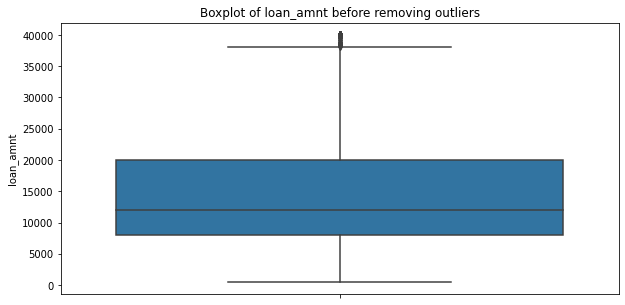

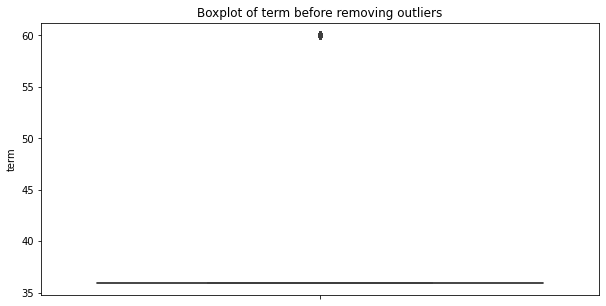

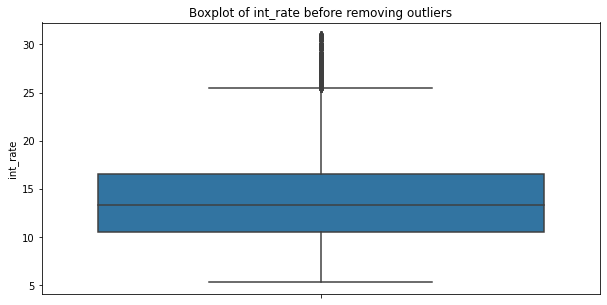

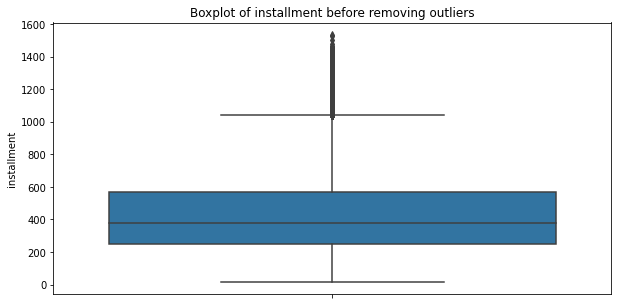

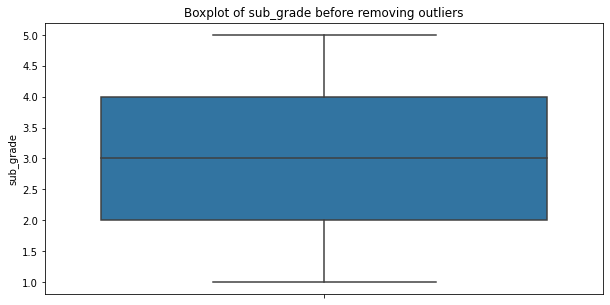

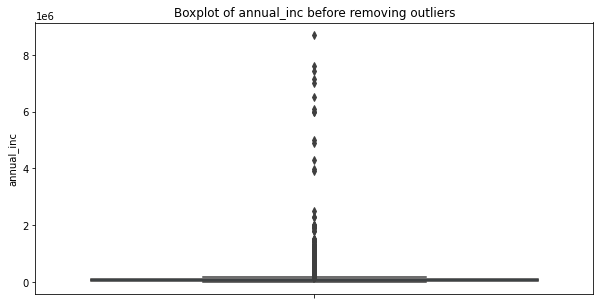

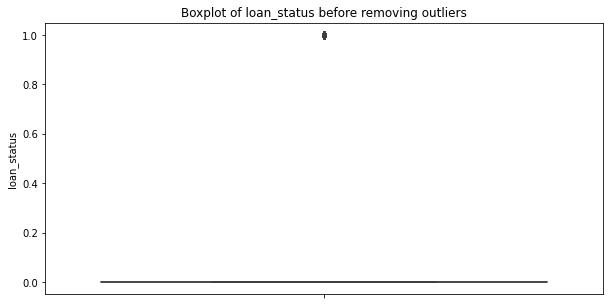

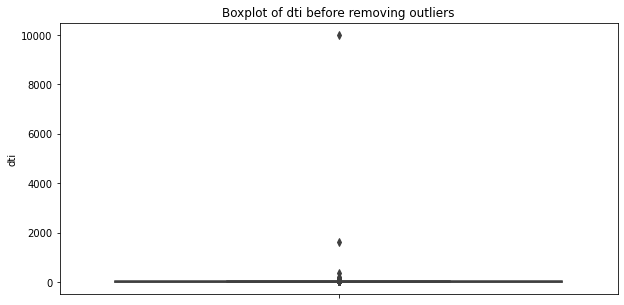

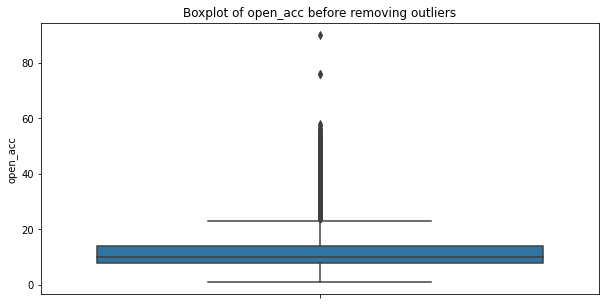

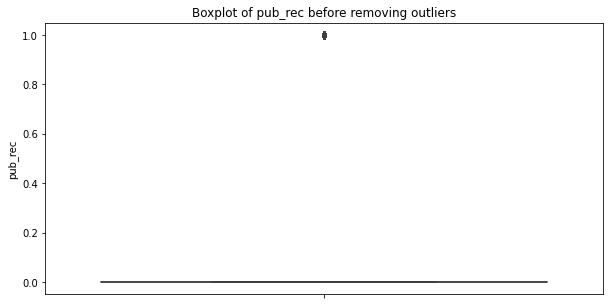

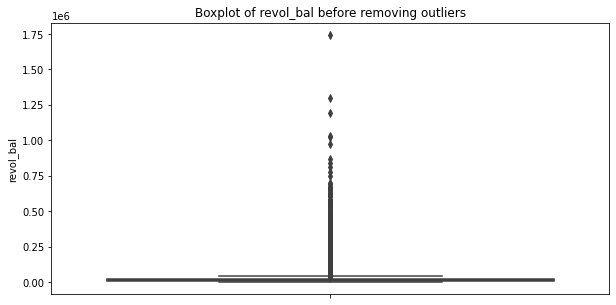

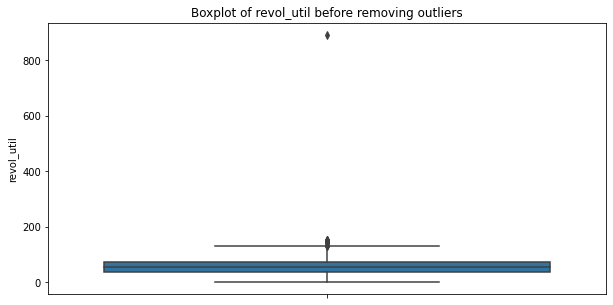

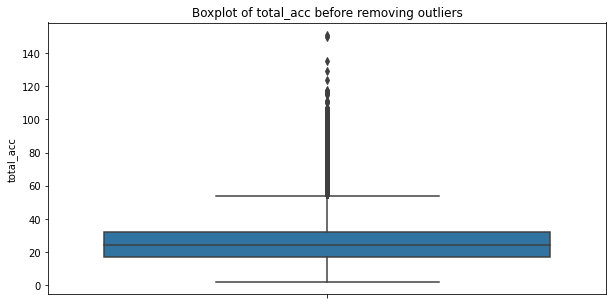

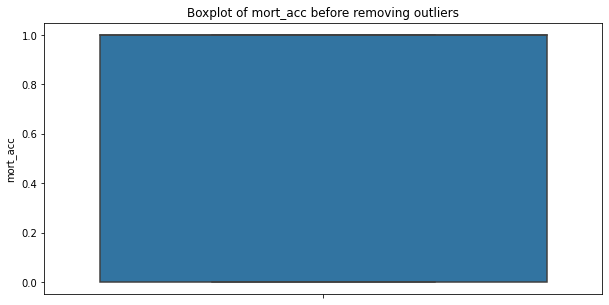

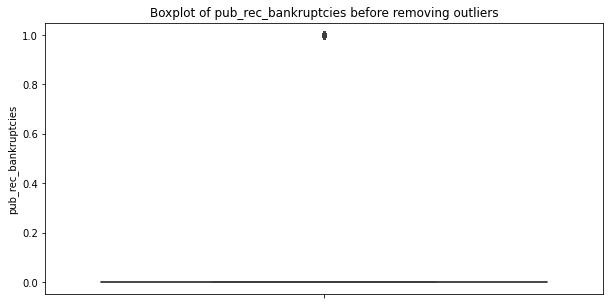

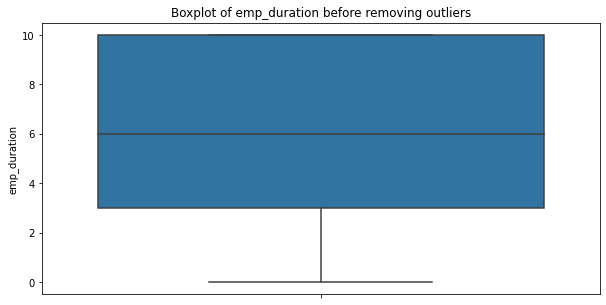

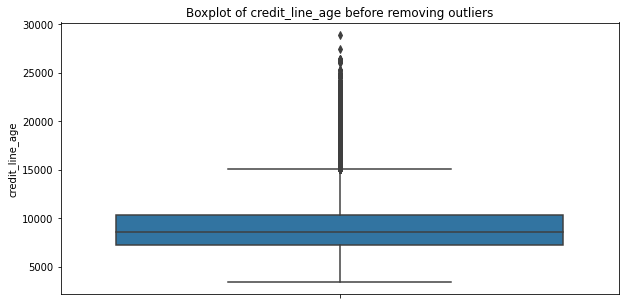

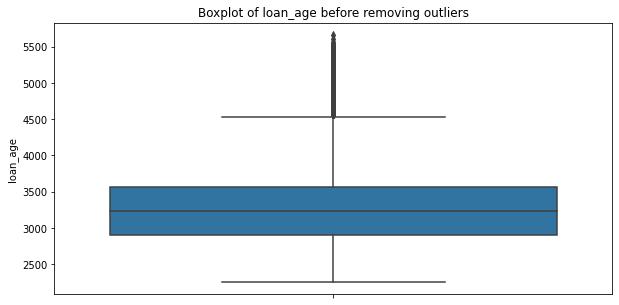

In [466]:
# Box plots before removing outliers
for col in num_features:
  plt.figure(figsize=(10, 5))
  sns.boxplot(y=work_df[col])
  plt.title(f"Boxplot of {col} before removing outliers")

  plt.show()

In [467]:
outliers_list = []
for col in num_features.columns:
  # print(num_features[col].mean())
  mean_value = num_features[col].mean()
  median_value = num_features[col].median()
  mean_median_diff = mean_value - median_value
  if mean_median_diff > 5:
    outliers_list.append(col)
  print('{0} has mean_median_diff of {1}'.format(col, mean_median_diff))
print(outliers_list)

loan_amnt has mean_median_diff of 2117.2699604793306
term has mean_median_diff of 5.699576836567424
int_rate has mean_median_diff of 0.30872751070615934
installment has mean_median_diff of 56.516978994319686
sub_grade has mean_median_diff of -0.027971992426264247
annual_inc has mean_median_diff of 10212.294264928263
loan_status has mean_median_diff of 0.19619025834572326
dti has mean_median_diff of 0.47339646474273067
open_acc has mean_median_diff of 1.3176013114254133
pub_rec has mean_median_diff of 0.14586049585096514
revol_bal has mean_median_diff of 4655.758057260493
revol_util has mean_median_diff of -1.0714142553975776
total_acc has mean_median_diff of 1.4258930273340695
mort_acc has mean_median_diff of -0.35340881654022593
pub_rec_bankruptcies has mean_median_diff of 0.11402793132807239
emp_duration has mean_median_diff of -0.0589023165974103
credit_line_age has mean_median_diff of 485.6454747774478
loan_age has mean_median_diff of 57.639087281285356
['loan_amnt', 'term', 'insta

In [468]:
# Treat Outliers using Capping method
for col in outliers_list:
  percentiles = work_df[col].quantile([0.01, 0.99]).values
  work_df[col] = np.clip(work_df[col], percentiles[0], percentiles[1])

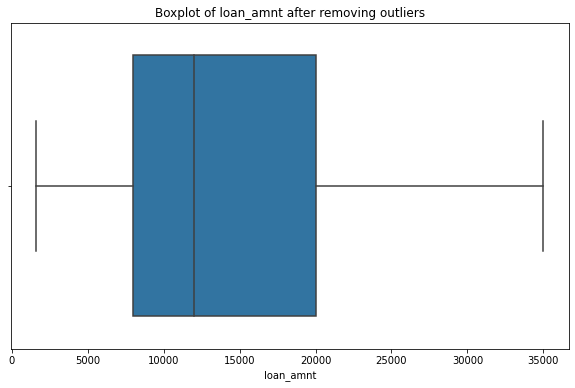

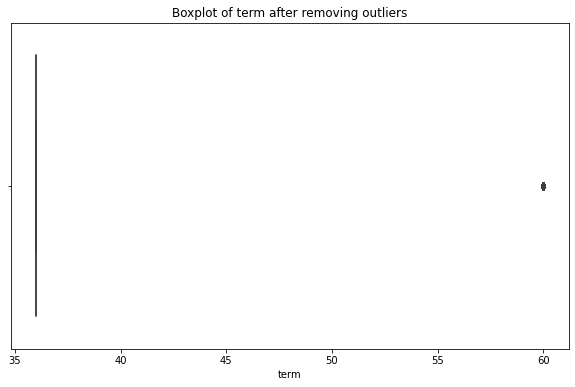

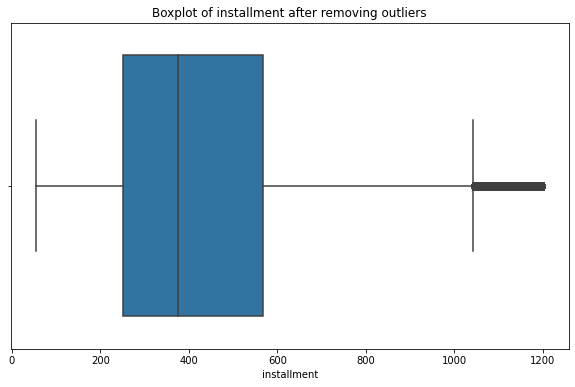

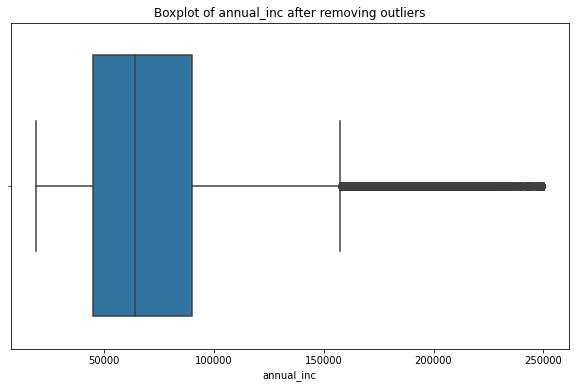

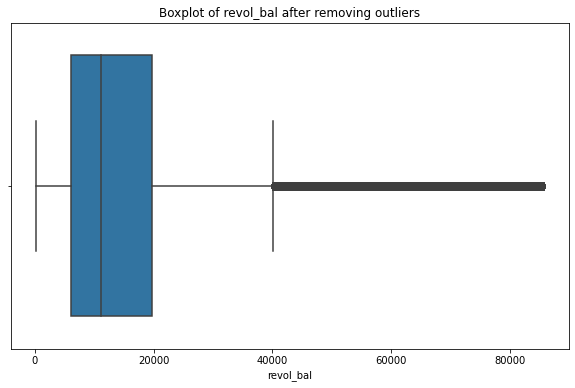

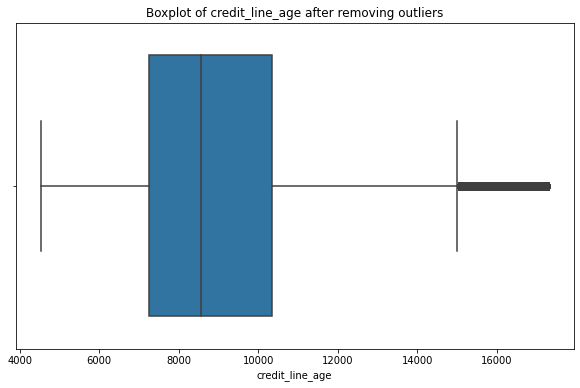

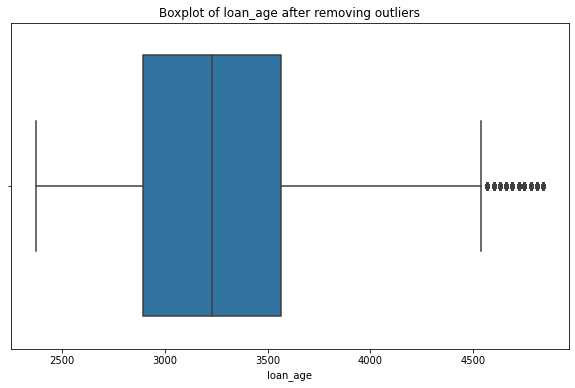

In [469]:
# Box plots after removing outliers
for i, j in enumerate(outliers_list):
  plt.figure(figsize=(10, 6))
  sns.boxplot(work_df[j])
  plt.title(f"Boxplot of {j} after removing outliers")

  plt.show()

In [470]:
# Treat Outliers with IQR method
for i, j in enumerate(outliers_list):
  q1 = work_df[j].quantile(0.25)
  q3 = work_df[j].quantile(0.75)
  iqr = q3 - q1
  work_df = work_df[(work_df[j] >= q1-1.5*iqr) & (work_df[j] <= q3+1.5*iqr)]

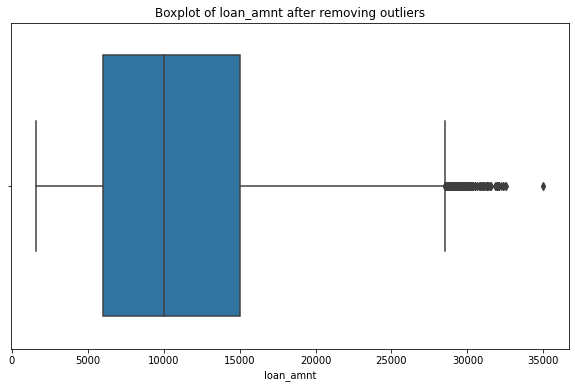

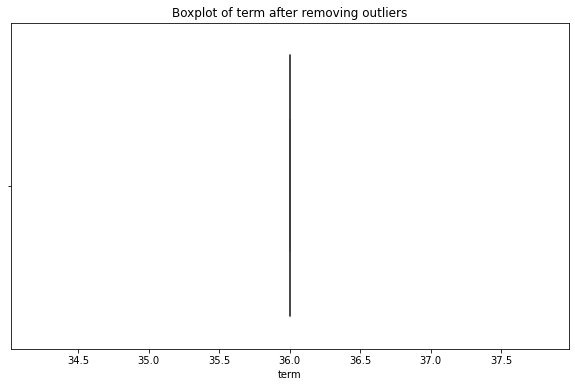

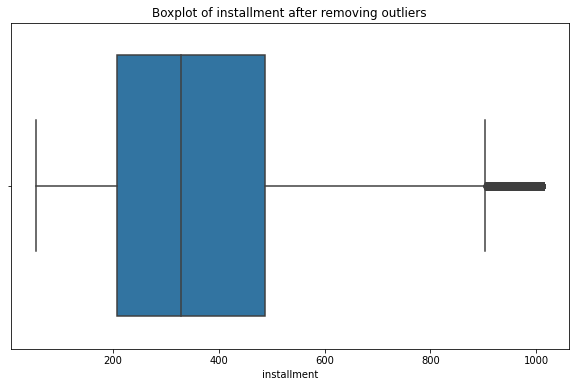

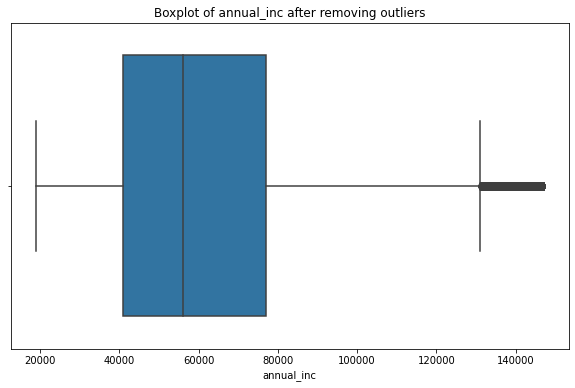

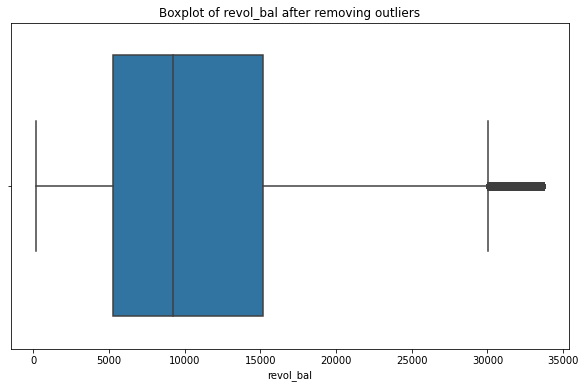

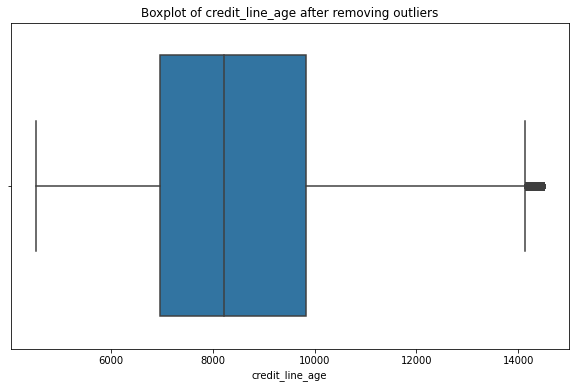

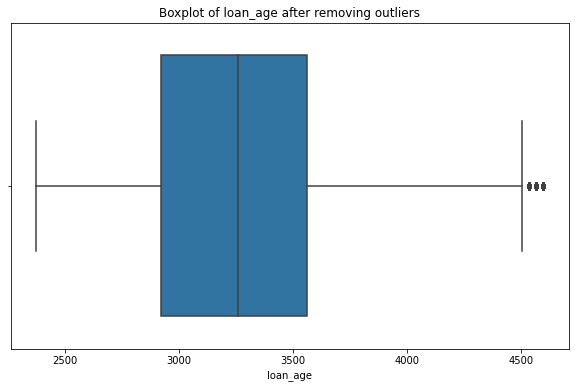

In [471]:
# Box plots after removing outliers
for i, j in enumerate(outliers_list):
  plt.figure(figsize=(10, 6))
  sns.boxplot(work_df[j])
  plt.title(f"Boxplot of {j} after removing outliers")

  plt.show()

In [472]:
work_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,243454.0,10891.374551,6036.061297,1600.00,6000.00,10000.00,15000.000,35000.00
term,243454.0,36.000000,0.000000,36.00,36.00,36.00,36.000,36.00
int_rate,243454.0,12.647265,3.919426,5.32,9.71,12.49,15.220,30.99
installment,243454.0,363.904166,200.705427,54.66,208.54,328.06,486.705,1013.43
sub_grade,243454.0,2.947485,1.407712,1.00,2.00,3.00,4.000,5.00
annual_inc,243454.0,61362.188853,26719.041305,19000.00,41000.00,56000.00,77000.000,147000.00
loan_status,243454.0,0.161681,0.368159,0.00,0.00,0.00,0.000,1.00
dti,243454.0,17.135749,8.687251,0.00,11.09,16.66,22.740,1622.00
open_acc,243454.0,10.771337,4.855060,1.00,7.00,10.00,13.000,54.00
pub_rec,243454.0,0.161476,0.367970,0.00,0.00,0.00,0.000,1.00


### Exploratory Data Analysis (EDA)

In [473]:
work_df.groupby(by = "loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,204092.0,10927.141069,6072.380153,1600.0,6000.0,10000.0,15000.0,35000.0
1,39362.0,10705.925131,5840.694217,1600.0,6000.0,10000.0,14650.0,32350.0


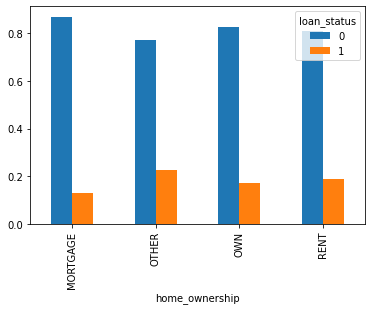

In [474]:
pd.crosstab(columns = work_df["loan_status"],
           index=work_df["home_ownership"], 
           normalize="index").plot(kind="bar")

In [475]:
work_df.groupby(by = "loan_status")["home_ownership"].describe()

,count,unique,top,freq
loan_status,,,,
0,204092,4,MORTGAGE,93616
1,39362,4,RENT,21311


##### **Observation**: The major home ownership types are - Mortgage and Rental. 

In [476]:
work_df.groupby(by = "loan_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,204092.0,12.313627,3.852737,5.32,9.17,12.12,14.65,30.99
1,39362.0,14.377174,3.805262,5.32,11.99,14.09,16.99,29.67


In [477]:
for col in work_df.columns:
  print(blue("Loan Status vs {0} \n", ['bold']).format(col))
  print(work_df.groupby(by='loan_status')[col].describe().round(1), '\n')

Loan Status vs loan_amnt 

                count     mean     std     min     25%      50%      75%  \
loan_status                                                                
0            204092.0  10927.1  6072.4  1600.0  6000.0  10000.0  15000.0   
1             39362.0  10705.9  5840.7  1600.0  6000.0  10000.0  14650.0   

                 max  
loan_status           
0            35000.0  
1            32350.0   

Loan Status vs term 

                count  mean  std   min   25%   50%   75%   max
loan_status                                                   
0            204092.0  36.0  0.0  36.0  36.0  36.0  36.0  36.0
1             39362.0  36.0  0.0  36.0  36.0  36.0  36.0  36.0 

Loan Status vs int_rate 

                count  mean  std  min   25%   50%   75%   max
loan_status                                                  
0            204092.0  12.3  3.9  5.3   9.2  12.1  14.6  31.0
1             39362.0  14.4  3.8  5.3  12.0  14.1  17.0  29.7 

Loan Status vs install

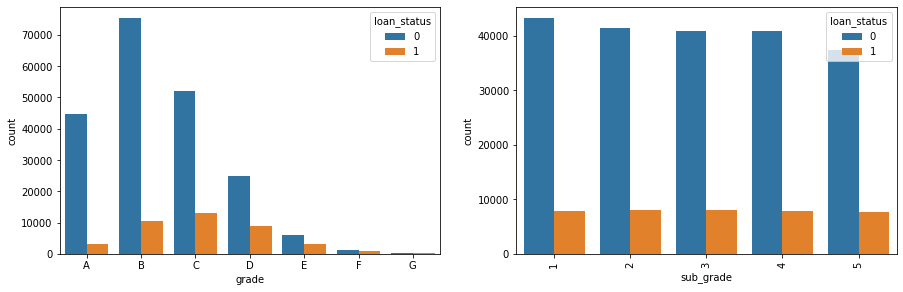

In [478]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
grade = sorted(work_df.grade.unique().tolist())
sns.countplot(x='grade', data=work_df, hue='loan_status', order=grade)
plt.subplot(2, 2, 2)
sub_grade = sorted(work_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=work_df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

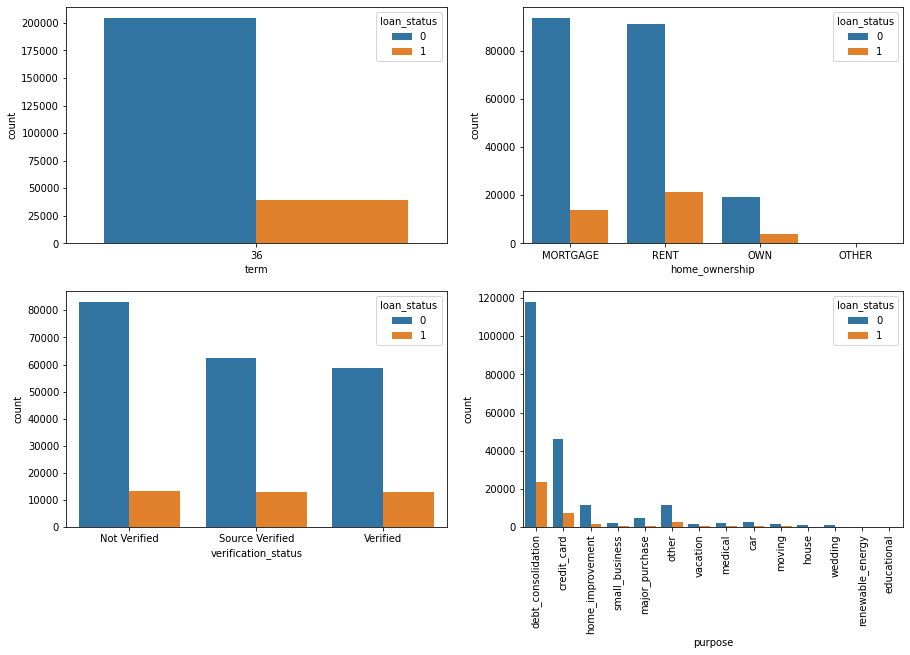

In [479]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
sns.countplot(x='term', data=work_df, hue='loan_status')
plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=work_df, hue='loan_status')
plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=work_df, hue='loan_status')
plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=work_df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

##### **Observation**: Loan taken for the porposes like dept_consolidation, credit card payments, small business investments, have high probability of borrowers

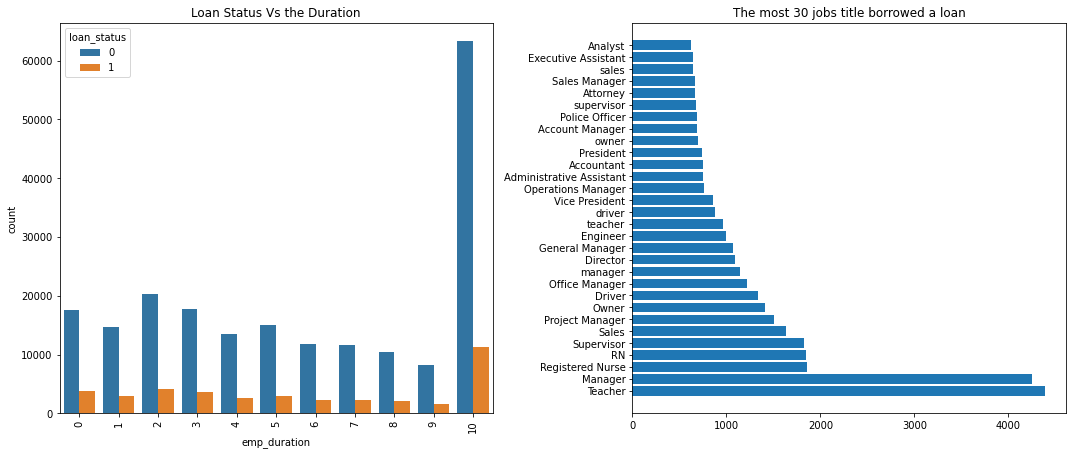

In [480]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
g = sns.countplot(x='emp_duration', data=work_df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title("Loan Status Vs the Duration")

plt.subplot(2, 2, 2)
plt.barh(data_df.emp_title.value_counts()[:30].index,
         data_df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title borrowed a loan")
plt.tight_layout()


<Figure size 1080x864 with 0 Axes>

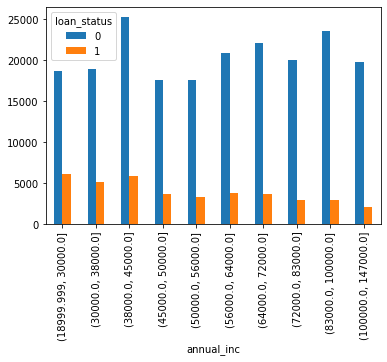

In [481]:
plt.figure(figsize=(15,12))
pd.crosstab(columns = work_df["loan_status"],
           index=pd.qcut(work_df["annual_inc"],10)).plot(kind="bar")

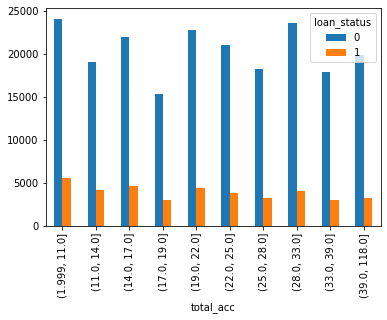

In [482]:
pd.crosstab(columns = work_df["loan_status"],
           index=pd.qcut(work_df["total_acc"],10)).plot(kind="bar")


INDIVIDUAL    243153
DIRECT_PAY       152
JOINT            149
Name: application_type, dtype: int64


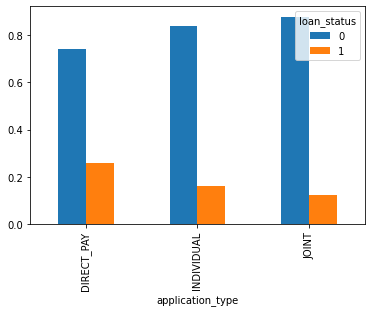

In [483]:
print(work_df["application_type"].value_counts(dropna=False))

pd.crosstab(index = work_df["application_type"],
            columns= work_df["loan_status"],normalize= "index").plot(kind = "bar")

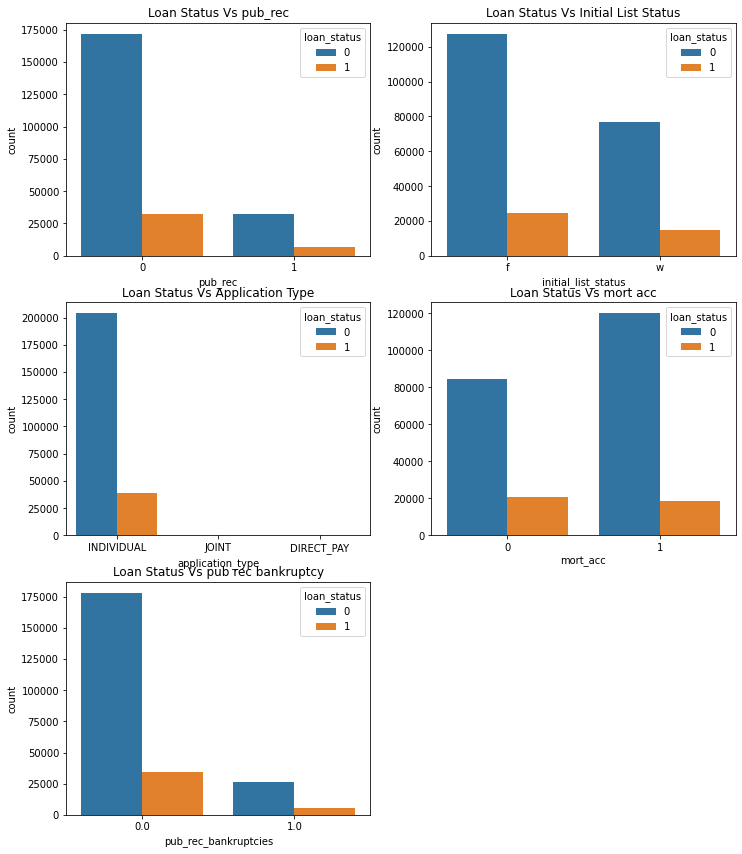

In [484]:
plt.figure(figsize=(12, 30))
plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=work_df, hue='loan_status')
plt.title("Loan Status Vs pub_rec")
plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=work_df, hue='loan_status')
plt.title("Loan Status Vs Initial List Status")
plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=work_df, hue='loan_status')
plt.title("Loan Status Vs Application Type")
plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=work_df, hue='loan_status')
plt.title("Loan Status Vs mort acc")
plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=work_df, hue='loan_status')
plt.title("Loan Status Vs pub rec bankruptcy")
plt.show()

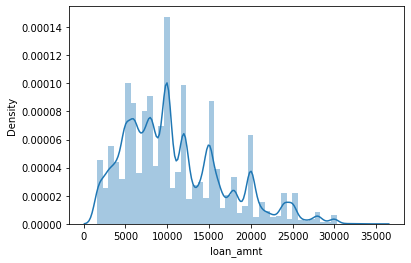

In [485]:
sns.distplot(work_df['loan_amnt'])

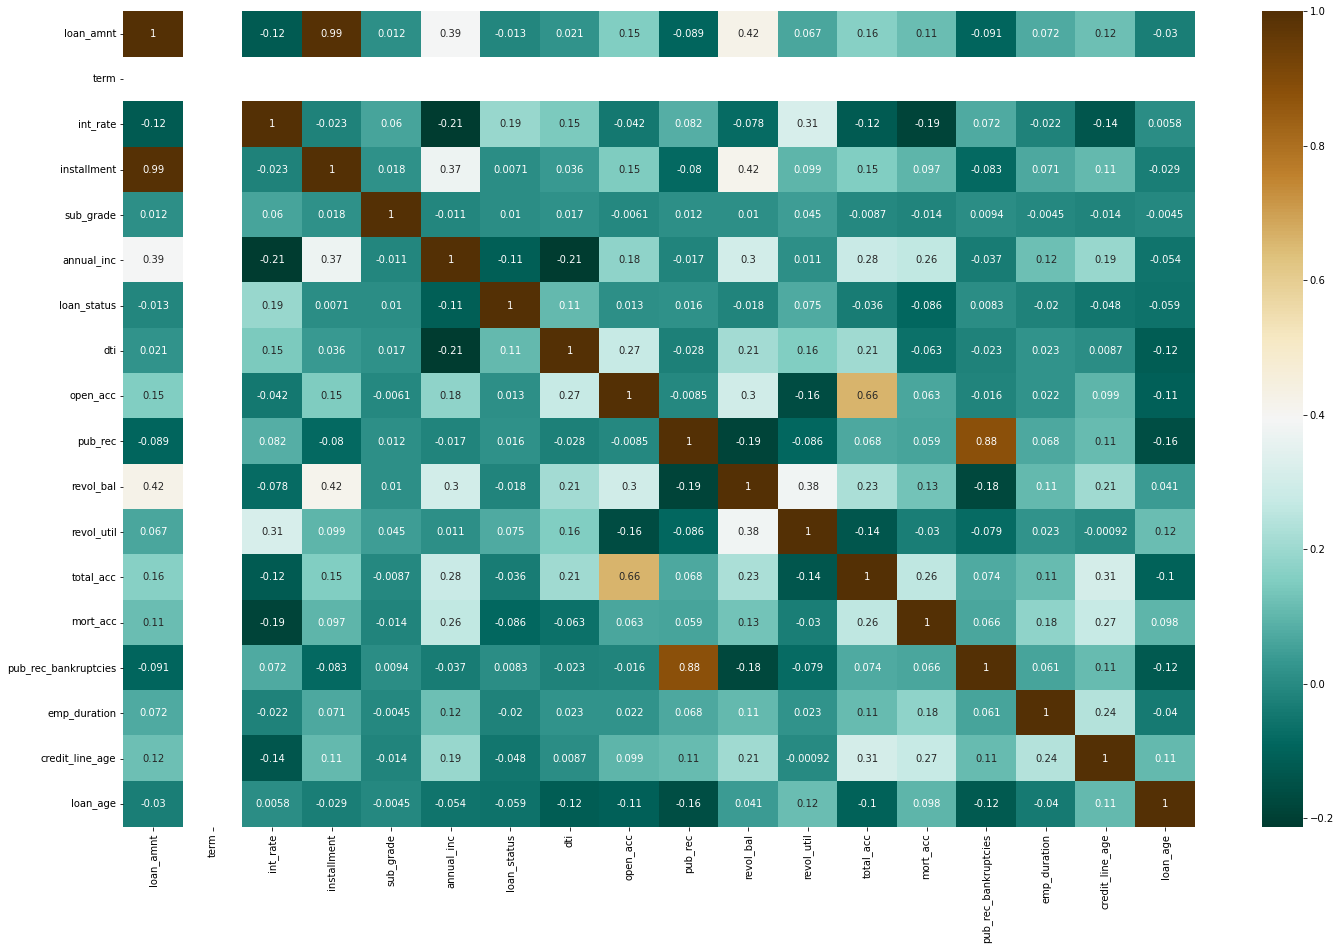

In [486]:
# Correlation check
plt.figure(figsize=(24,15))
sns.heatmap(work_df.corr(),annot=True,cmap='BrBG_r')

plt.show()

### Encoding Categorical Variables

In [502]:
from sklearn.preprocessing import LabelEncoder

In [503]:
lab_encoder = LabelEncoder()
work_df['loan_status'] = lab_encoder.fit_transform(work_df.loan_status)
work_df['grade'] = lab_encoder.fit_transform(work_df.grade)
work_df['home_ownership'] = lab_encoder.fit_transform(work_df.home_ownership)
work_df['verification_status'] = lab_encoder.fit_transform(work_df.verification_status)

In [504]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [505]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
work_df['emp_title'] = encoder.fit_transform(work_df['emp_title'], work_df['loan_status'])
work_df['purpose'] = encoder.fit_transform(work_df['purpose'], work_df['loan_status'])

In [510]:
# Data with no order between categories
temp = pd.get_dummies(work_df, columns=['application_type', 'initial_list_status', 'term'], drop_first=True)
work_df = pd.concat([work_df, temp], axis=1)

work_df.drop(['term', 'initial_list_status', 'application_type'], axis='columns', inplace=True)

### Model building

In [518]:
# Split the Independent (Input) & Dependent (Target) Variables
X = work_df.drop(['loan_status'], axis=1)
y = work_df['loan_status']
y = y.iloc[:, 1].values

In [519]:
# Get the Train-Test split
from sklearn.model_selection import train_test_split

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [521]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression on non-standardized data

In [522]:
from sklearn.linear_model import LogisticRegression

In [523]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [524]:
classifier.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [525]:
weight = classifier.coef_
weight

array([[-0.35439649, -0.34884025,  0.42599237,  0.50382102,  0.12713263,
         0.72867242,  0.05890353,  0.02901183, -0.04585802,  0.01832458,
         0.09074298,  0.09461238,  0.00996231, -0.03346158,  0.09989464,
        -0.02195795, -0.02433002, -0.02893309, -0.01899549, -0.01650691,
         0.05160198, -0.35439649, -0.34884025,  0.42599237,  0.50382102,
         0.12713263,  0.72867242,  0.05890353,  0.02901183, -0.04585802,
         0.01832458,  0.09074298,  0.09461238,  0.00996231, -0.03346158,
         0.09989464, -0.02195795, -0.02433002, -0.02893309, -0.01899549,
        -0.01650691,  0.05160198,  0.03491341, -0.00552307, -0.01912935]])

In [526]:
def logreg_to_dict(clf, feature_names):
  coefs = np.concatenate([clf.intercept_, clf.coef_.squeeze()])
  return dict(zip(["intercept"] + feature_names, coefs))

print(logreg_to_dict(classifier, X.columns.tolist()))


{'intercept': -2.3926974853306184, 'loan_amnt': -0.35439648621925984, 'int_rate': -0.3488402466342704, 'installment': 0.42599236674917385, 'grade': 0.5038210176922596, 'sub_grade': 0.1271326258635427, 'emp_title': 0.7286724217905405, 'home_ownership': 0.05890353096466558, 'annual_inc': 0.029011830578835798, 'verification_status': -0.04585801794596382, 'purpose': 0.018324575773369947, 'dti': 0.09074298194780987, 'open_acc': 0.09461237555154917, 'pub_rec': 0.009962309182153569, 'revol_bal': -0.033461582635030025, 'revol_util': 0.09989463645793052, 'total_acc': -0.021957946596498086, 'mort_acc': -0.024330022317003746, 'pub_rec_bankruptcies': -0.028933094396341216, 'emp_duration': -0.018995485967829275, 'credit_line_age': -0.01650690774502955, 'loan_age': 0.05160198106925419, 'application_type_INDIVIDUAL': 0.03491341092235009, 'application_type_JOINT': -0.0055230706690407765, 'initial_list_status_w': -0.019129353662620672}


In [527]:
y_pred = classifier.predict(X_test)

In [528]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)

In [529]:
cm

array([[39200,  1608],
       [ 3945,  3938]])

In [530]:
precision_score(y_test, y_pred)

0.710061305445366

In [531]:
recall_score(y_test, y_pred)

0.4995560065964734

In [532]:
f1_score(y_test, y_pred)

0.5864919204706233

In [533]:
# Estimate the probability of belonging to Class 1
probs = classifier.predict_proba(X_test)[:, 1]

0.8793112322758574

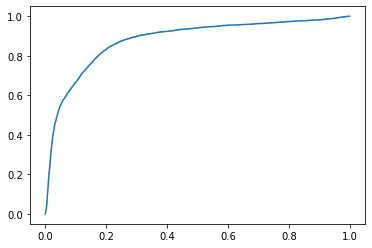

In [534]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thres = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
roc_auc_score(y_test, probs)